# Regression with a Flood Prediction using XGBOOST

# Why Flooding occurs ?


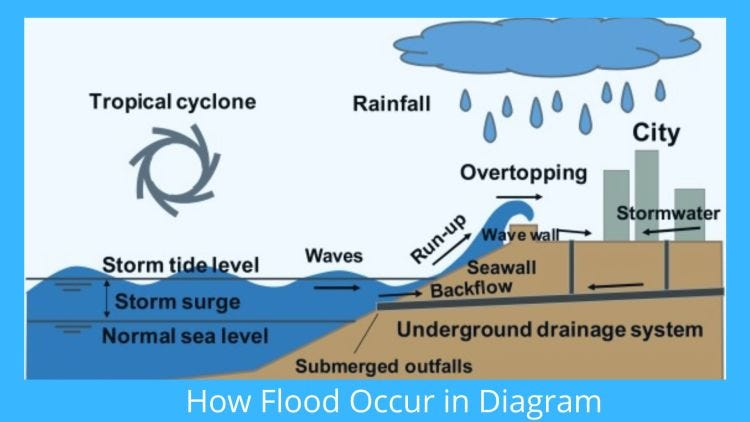

1.Heavy Rainfall: Intense or prolonged rainfall can lead to an excessive inflow of water into rivers, streams, and other water bodies, causing them to overflow their banks and inundate nearby areas.

2.Storm Surges: Tropical storms, hurricanes, or cyclones can generate powerful winds that push water toward the coast, resulting in a surge of seawater that inundates coastal regions.

3.Snowmelt: Rapid melting of snow, particularly during warmer weather or sudden temperature changes, can cause a rapid increase in water runoff, leading to flooding in downstream areas.

4.River Overflow: High volumes of water flowing downstream in rivers can exceed the capacity of river channels, causing them to overflow and flood adjacent areas.

5.Urbanization: Increased urbanization with impermeable surfaces such as concrete and asphalt can reduce natural drainage, leading to water runoff and increased risk of flash flooding in urban areas.

6.Deforestation: Removal of trees and vegetation can disrupt natural drainage patterns, increase soil erosion, and reduce the capacity of the land to absorb water, contributing to flooding.

7.Failure of Infrastructure: Dam or levee failures, inadequate drainage systems, or blockages in waterways can all contribute to flooding by impeding the flow of water and causing it to accumulate in specific areas.

# Objective 

Our objective in this competition is to develop a predictive model that accurately estimates the probability of flooding in a given region. Flooding presents significant challenges and risks, impacting communities, infrastructure, and the environment. By analyzing diverse factors including geographical characteristics, weather trends, land usage, and historical flood occurrences, our aim is to construct a robust model capable of assessing flood risk with precision. Through data-driven insights, we strive to enhance preparedness and resilience, empowering stakeholders to implement proactive measures and mitigate the impact of flooding events on society and the ecosystem."

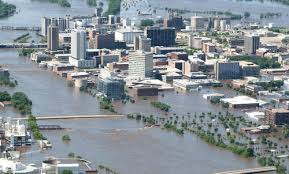

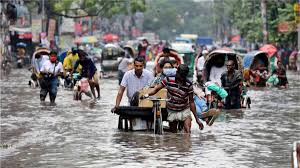    

# Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 200)



In [2]:
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

from sklearn.ensemble import VotingRegressor



In [3]:
import optuna


from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.base import clone
from termcolor import colored 

# arranging  building the  compose design form pattern shape.

In [4]:
palette = ['#20B2AA', '#D8BFD8', '#8B0000', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

config = {
    'SEED' : 42,
    'N_SPLITS': 5,
    'SUBMIT' : True,
    'USE_ORIGINAL': False
    
}

# load dataset

In [5]:
#load dataset 
train = pd.read_csv(r"C:\Users\jayesh\Downloads\playground-series-s4e5\train.csv", index_col='id')
test = pd.read_csv(r"C:\Users\jayesh\Downloads\playground-series-s4e5\test.csv", index_col='id')
sample_submission = pd.read_csv(r"C:\Users\jayesh\Downloads\playground-series-s4e5\sample_submission.csv")


In [6]:
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


### Data Dictionary

#### Train Data

| Column Name | Description                              |
|-------------|------------------------------------------|
| id          | Unique identifier for each observation.  |
| feature1    | Description of feature1.                 |
| feature2    | Description of feature2.                 |
| ...         | Description of other features.           |
| target      | Target variable to be predicted.         |

#### Test Data

| Column Name | Description                              |
|-------------|------------------------------------------|
| id          | Unique identifier for each observation.  |
| feature1    | Description of feature1.                 |
| feature2    | Description of feature2.                 |
| ...         | Description of other features.           |

#### Sample Submission Data

| Column Name | Description                              |
|-------------|------------------------------------------|
| id          | Unique identifier for each observation.  |
| target      | Predicted target variable for each id.   |


# EDA

In [7]:
train.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [10]:
train.nunique()

MonsoonIntensity                   17
TopographyDrainage                 19
RiverManagement                    17
Deforestation                      18
Urbanization                       18
ClimateChange                      18
DamsQuality                        17
Siltation                          17
AgriculturalPractices              17
Encroachments                      19
IneffectiveDisasterPreparedness    17
DrainageSystems                    18
CoastalVulnerability               18
Landslides                         17
Watersheds                         17
DeterioratingInfrastructure        18
PopulationScore                    19
WetlandLoss                        20
InadequatePlanning                 17
PoliticalFactors                   17
FloodProbability                   83
dtype: int64

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


# Visualization

# Monsoon Intensity and flood probability

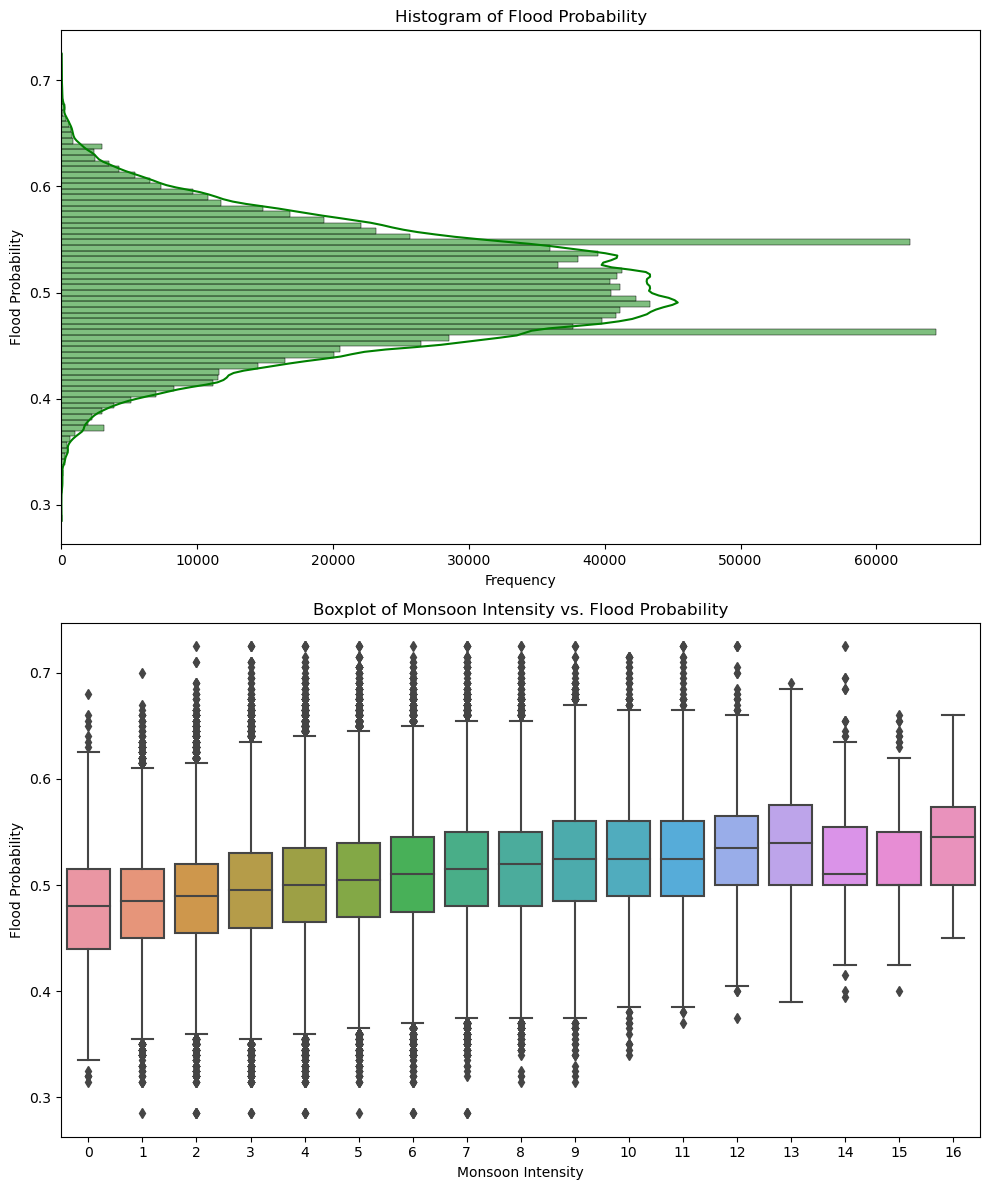

In [12]:

# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot histogram for Flood Probability
sns.histplot(data=train, y='FloodProbability', bins=83, kde=True, color='g', ax=axs[0])
axs[0].set_ylabel('Flood Probability')
axs[0].set_xlabel('Frequency')
axs[0].set_title('Histogram of Flood Probability')

# Plot boxplot for Monsoon Intensity vs. Flood Probability
sns.boxplot(data=train, x='MonsoonIntensity', y='FloodProbability', ax=axs[1])
axs[1].set_xlabel('Monsoon Intensity')
axs[1].set_ylabel('Flood Probability')
axs[1].set_title('Boxplot of Monsoon Intensity vs. Flood Probability')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Topography Drainage

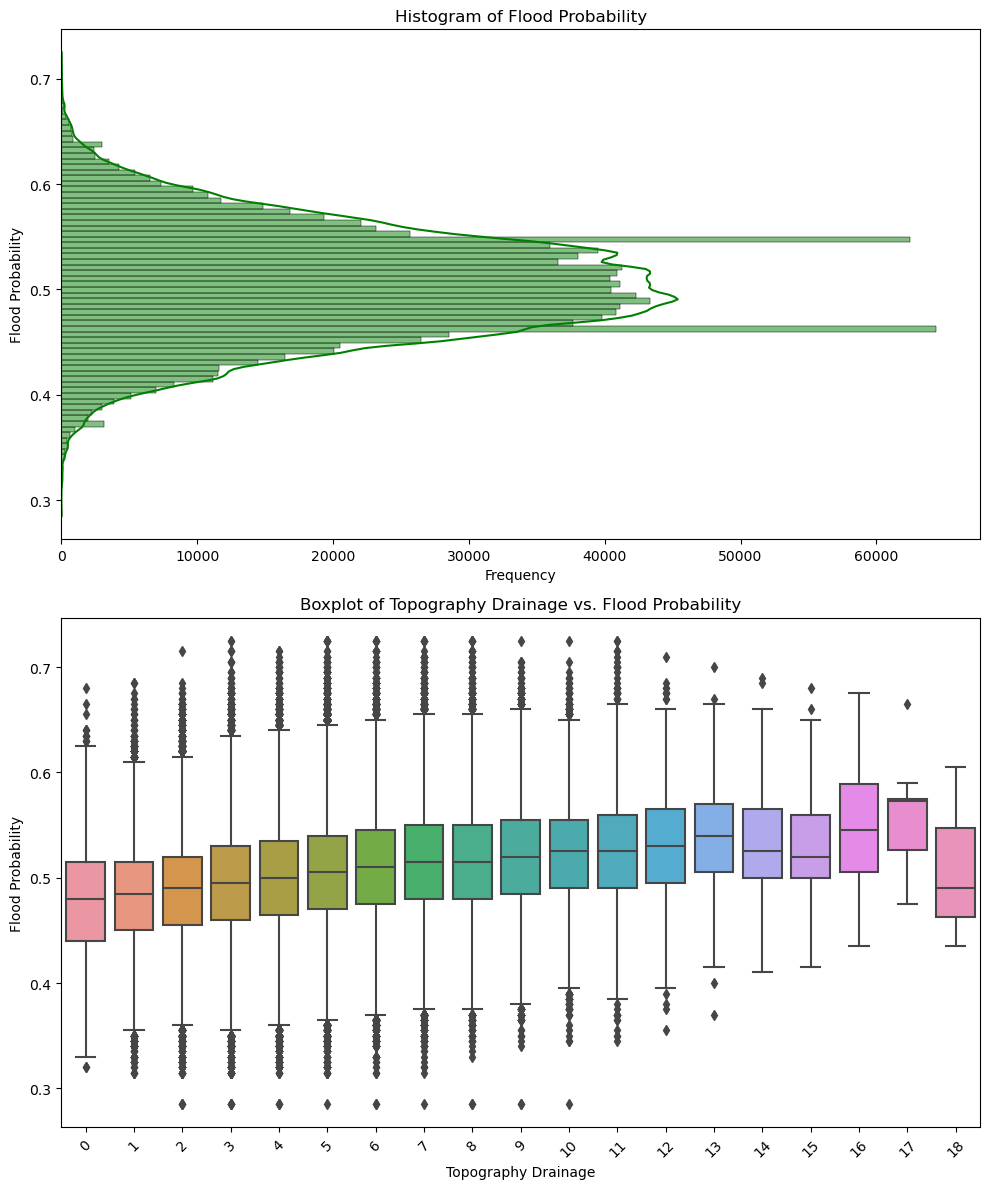

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot histogram for Flood Probability
sns.histplot(data=train, y='FloodProbability', bins=83, kde=True, color='g', ax=axs[0])
axs[0].set_ylabel('Flood Probability')
axs[0].set_xlabel('Frequency')
axs[0].set_title('Histogram of Flood Probability')

# Plot boxplot for Topography Drainage vs. Flood Probability
sns.boxplot(data=train, x='TopographyDrainage', y='FloodProbability', ax=axs[1])
axs[1].set_xlabel('Topography Drainage')
axs[1].set_ylabel('Flood Probability')
axs[1].set_title('Boxplot of Topography Drainage vs. Flood Probability')

# Rotate x-axis labels for better readability
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# River Management

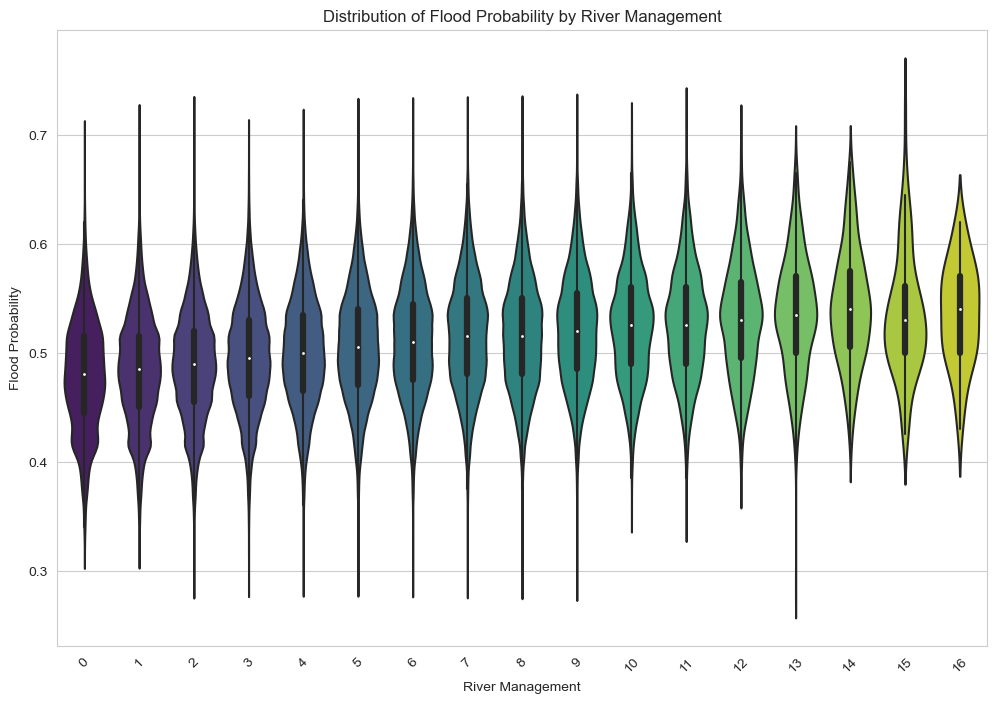

In [14]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create a violin plot for Flood Probability by River Management
plt.figure(figsize=(12, 8))
sns.violinplot(data=train, x='RiverManagement', y='FloodProbability', palette='viridis')
plt.xlabel('River Management')
plt.ylabel('Flood Probability')
plt.title('Distribution of Flood Probability by River Management')
plt.xticks(rotation=45)
plt.show()


# Flood Probability vs. Deforestation

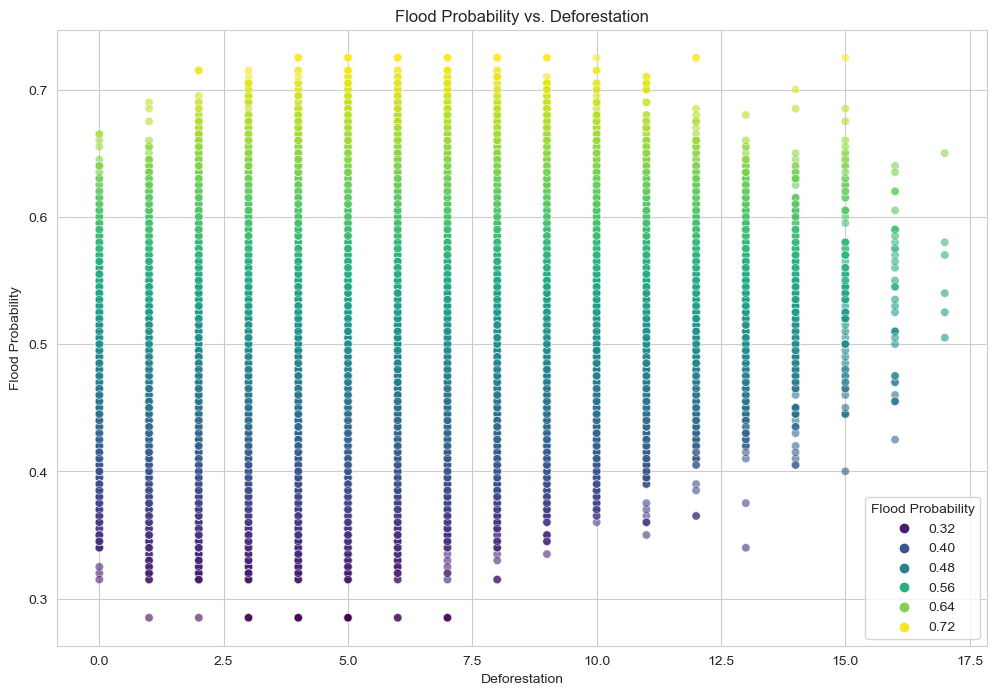

In [15]:

plt.figure(figsize=(12, 8))
sns.scatterplot(data=train, x='Deforestation', y='FloodProbability', hue='FloodProbability', palette='viridis', alpha=0.6)
plt.xlabel('Deforestation')
plt.ylabel('Flood Probability')
plt.title('Flood Probability vs. Deforestation')
plt.legend(title='Flood Probability')
plt.grid(True)
plt.show()


# Urbanization

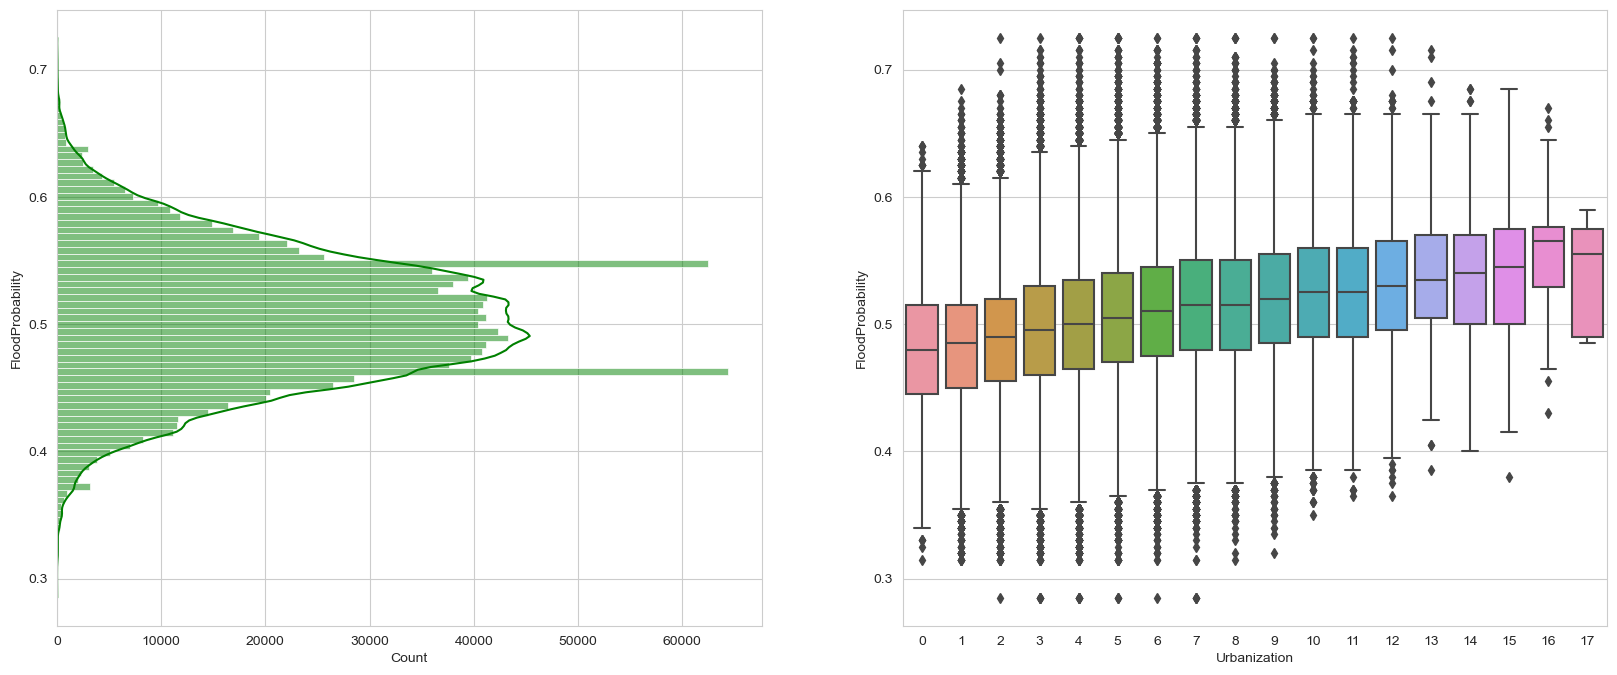

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='Urbanization', y='FloodProbability')
plt.show()

# ClimateChange

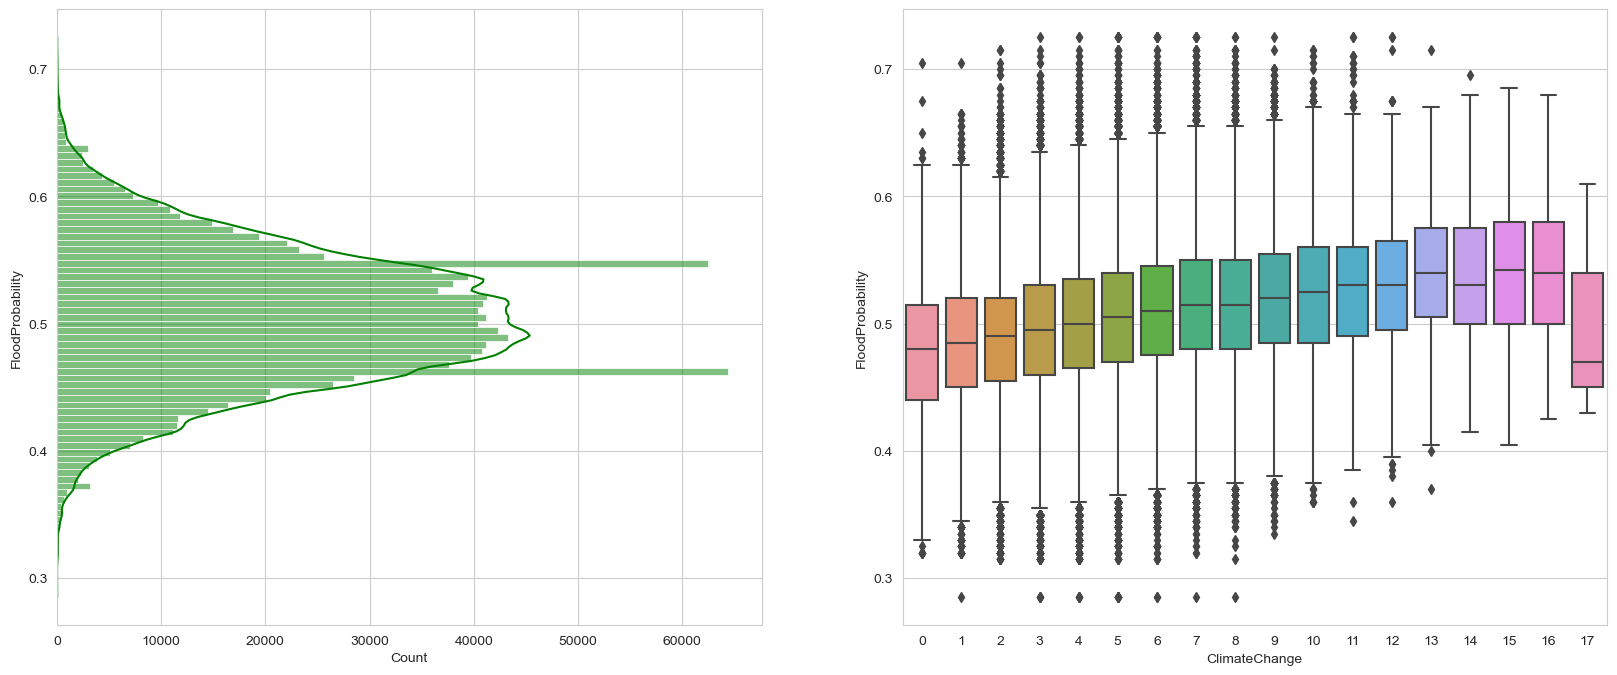

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='ClimateChange', y='FloodProbability')
plt.show()

# DamsQuality

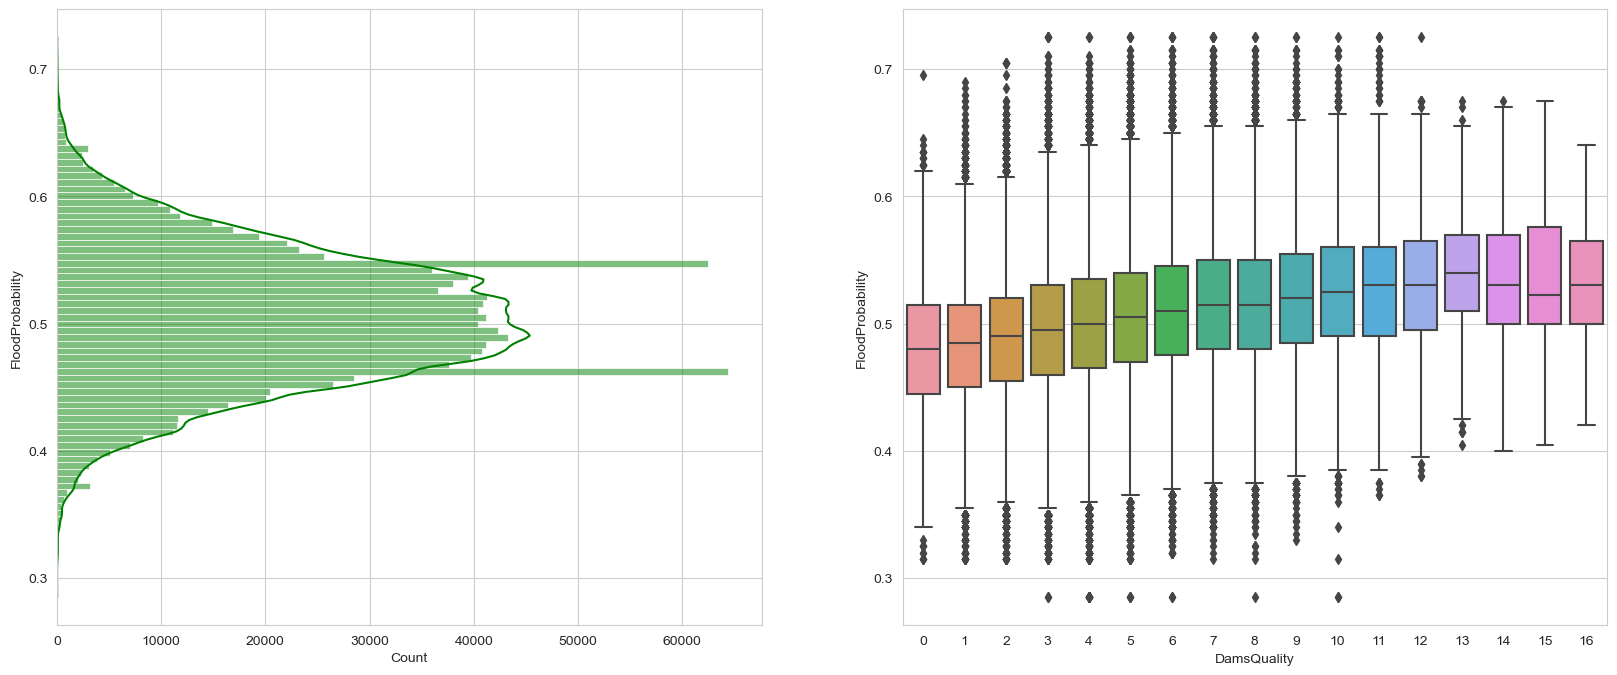

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='DamsQuality', y='FloodProbability')
plt.show()

# Siltation

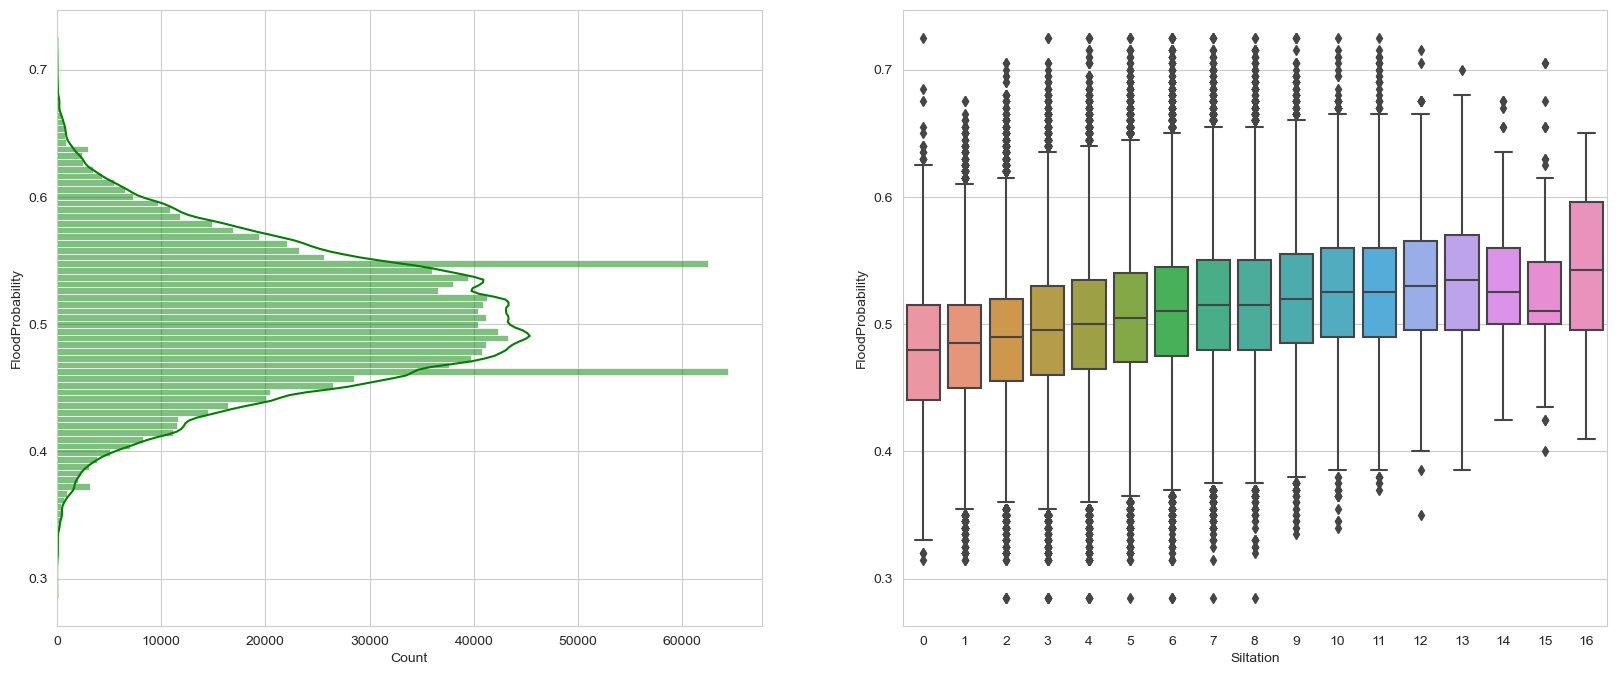

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='Siltation', y='FloodProbability')
plt.show()

# Agricultural Practices

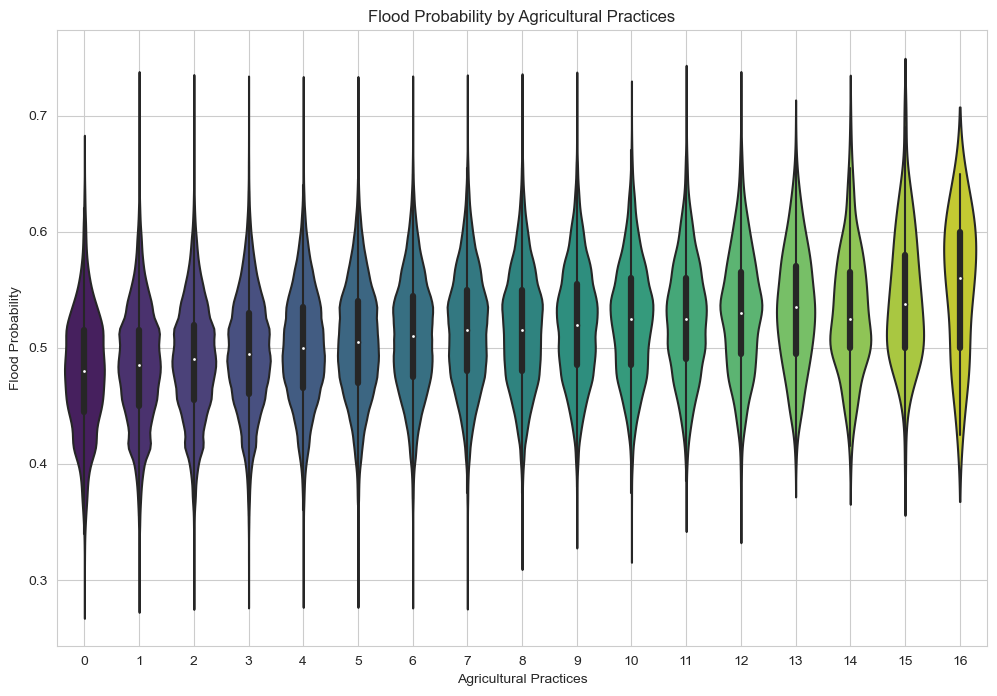

In [20]:
# Create a violin plot for Flood Probability by Agricultural Practices
plt.figure(figsize=(12, 8))
sns.violinplot(data=train, x='AgriculturalPractices', y='FloodProbability', palette='viridis')
plt.xlabel('Agricultural Practices')
plt.ylabel('Flood Probability')
plt.title('Flood Probability by Agricultural Practices')
plt.grid(True)
plt.show()


# Encroachments

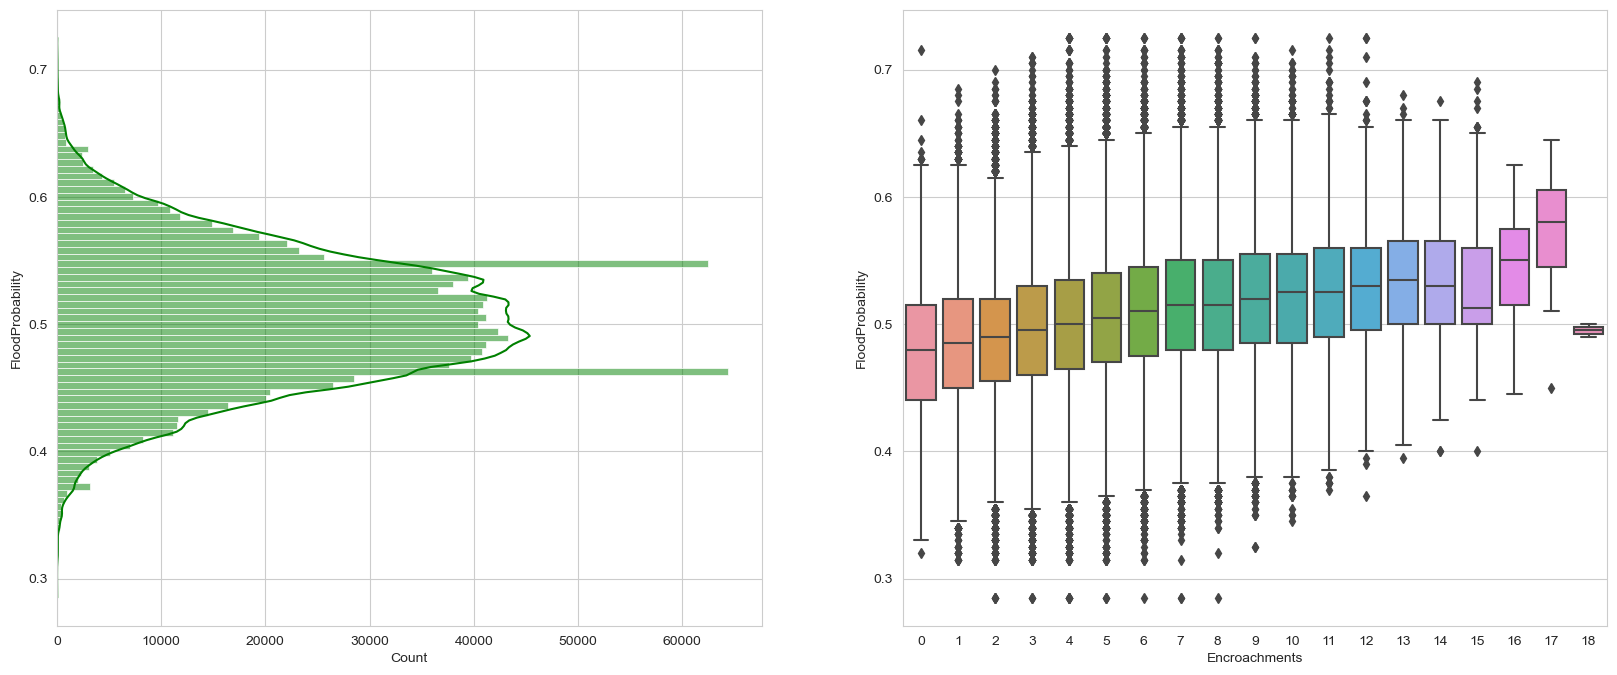

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='Encroachments', y='FloodProbability')
plt.show()


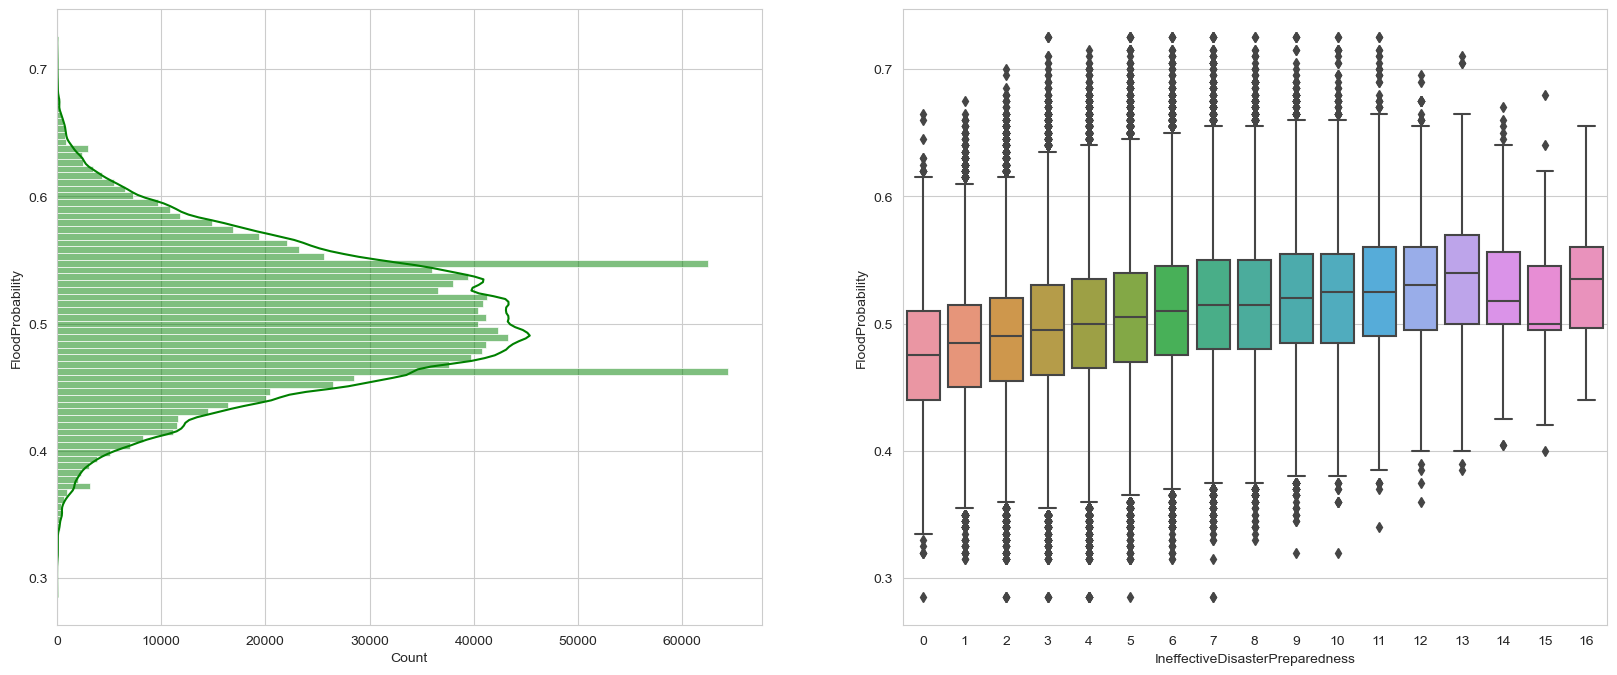

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='IneffectiveDisasterPreparedness', y='FloodProbability')
plt.show()

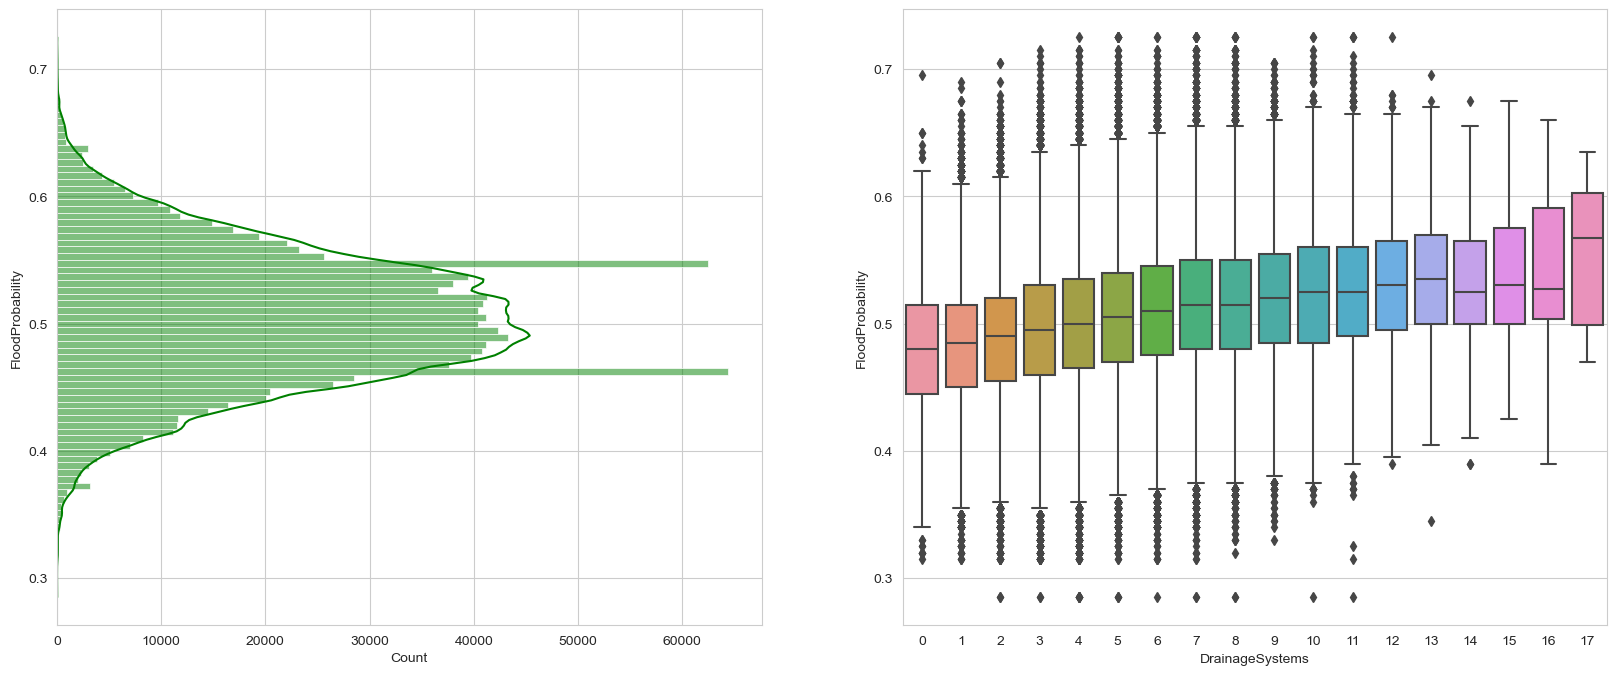

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='DrainageSystems', y='FloodProbability')
plt.show()

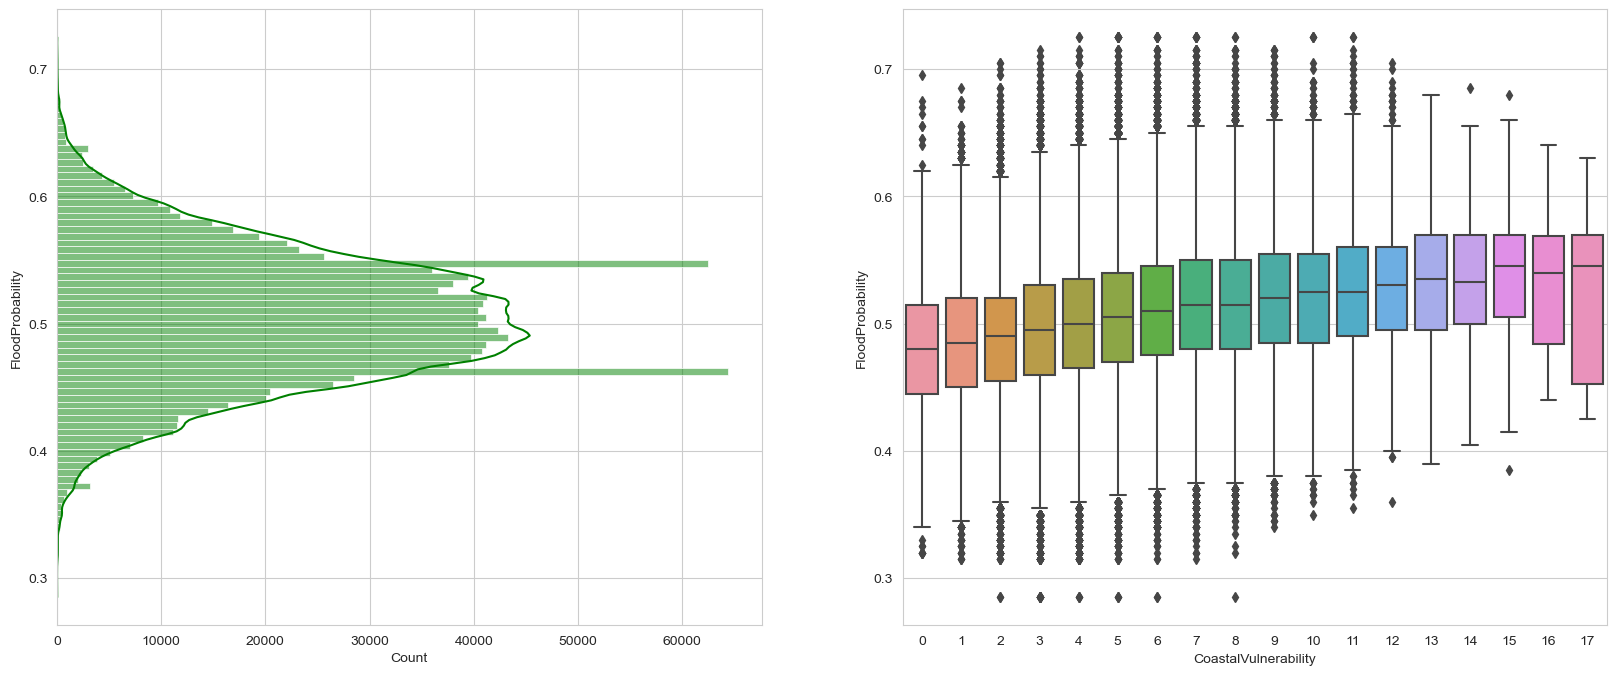

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='CoastalVulnerability', y='FloodProbability')
plt.show()

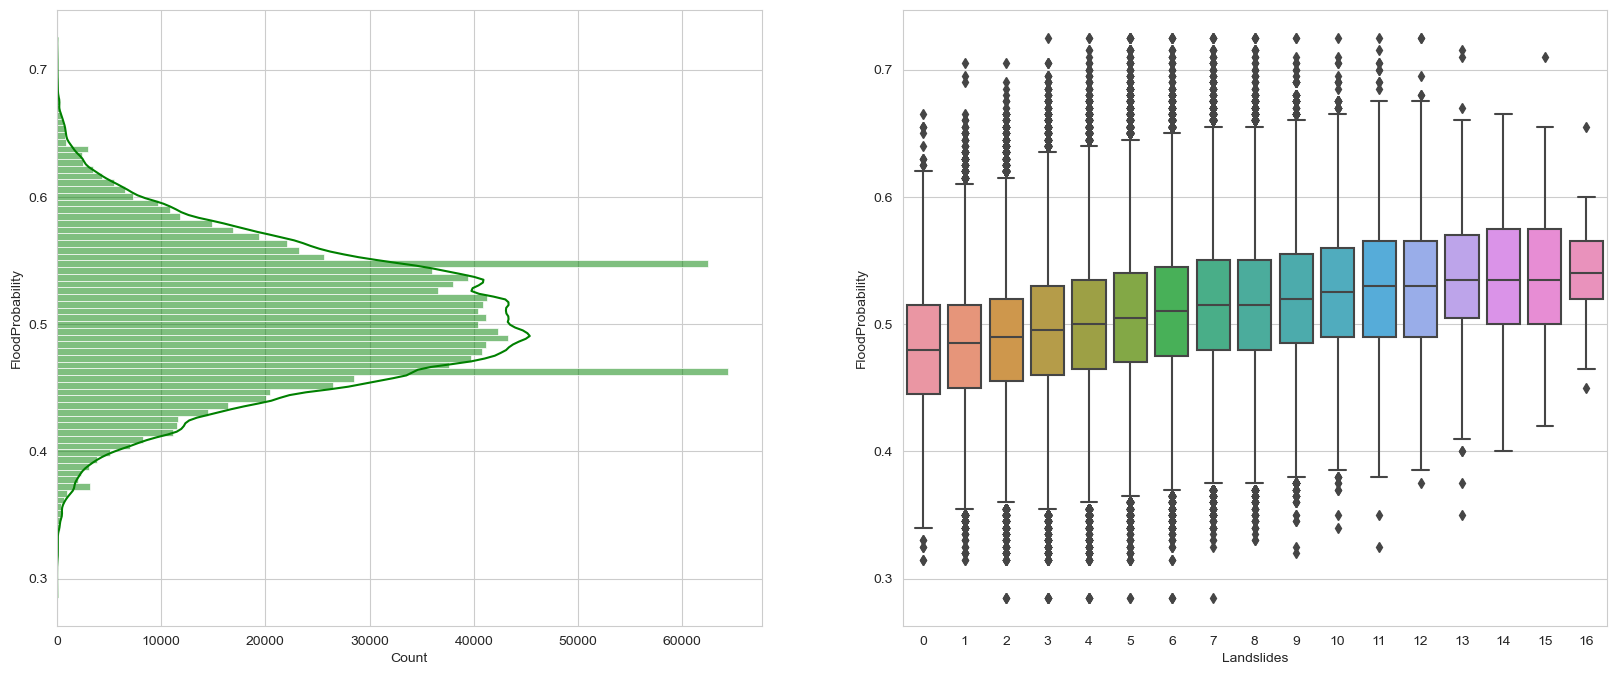

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='Landslides', y='FloodProbability')
plt.show()

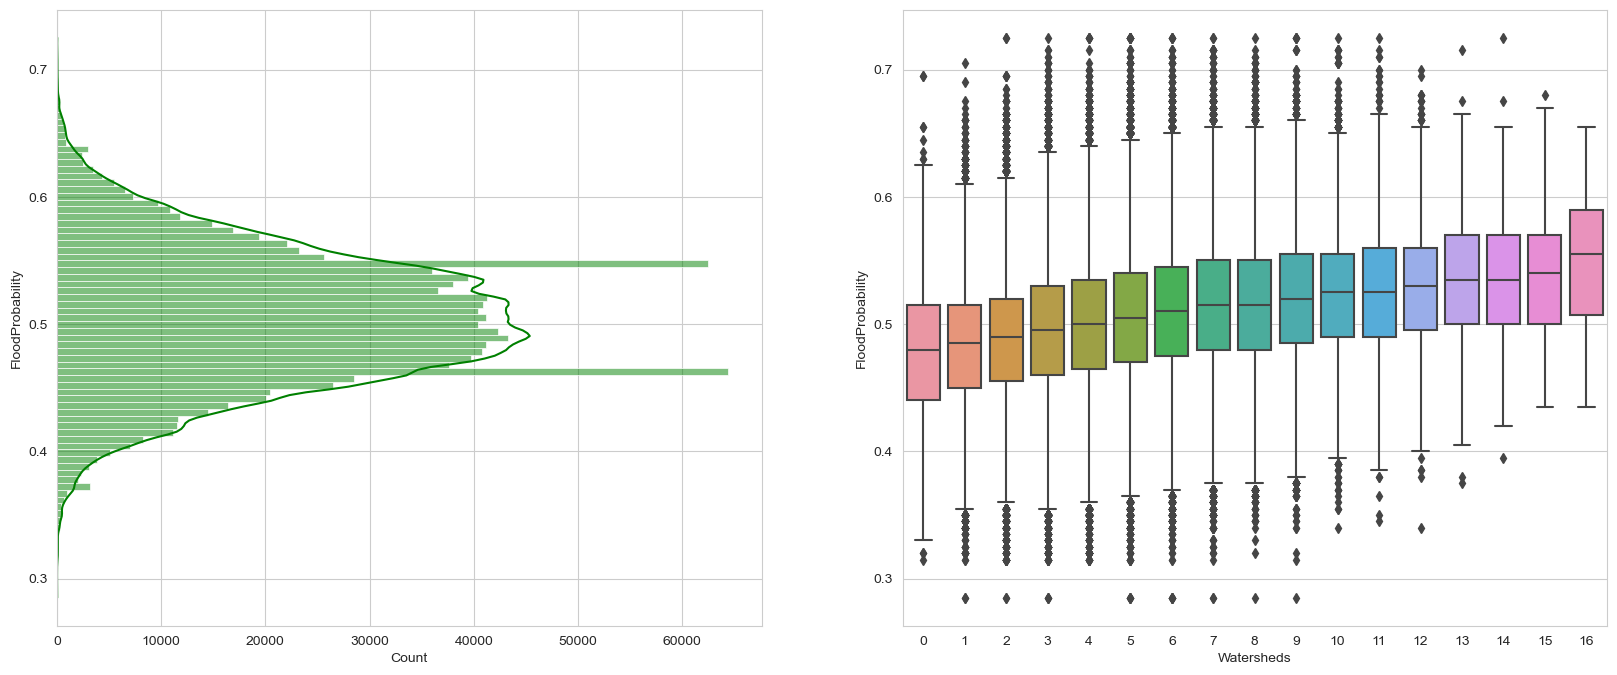

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='Watersheds', y='FloodProbability')
plt.show()

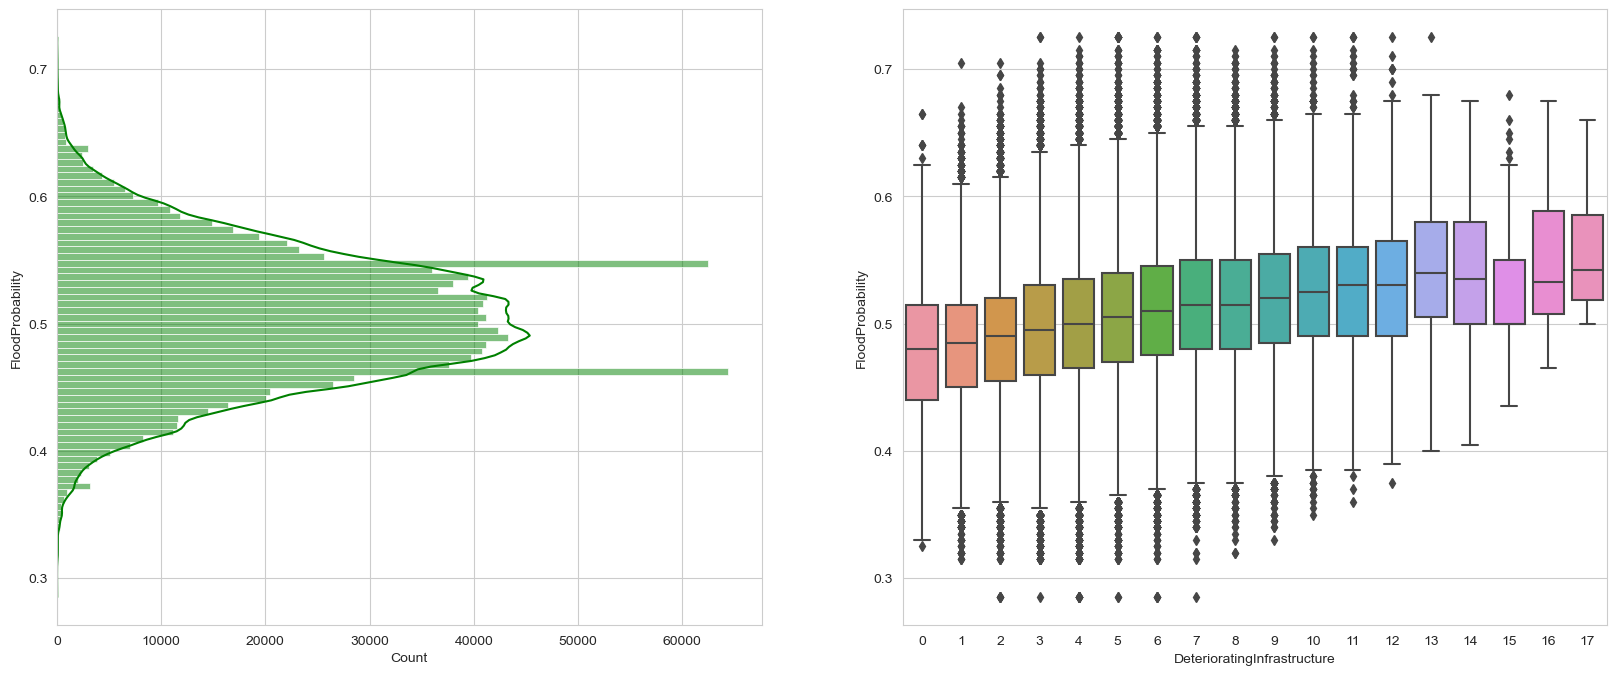

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='DeterioratingInfrastructure', y='FloodProbability')
plt.show()

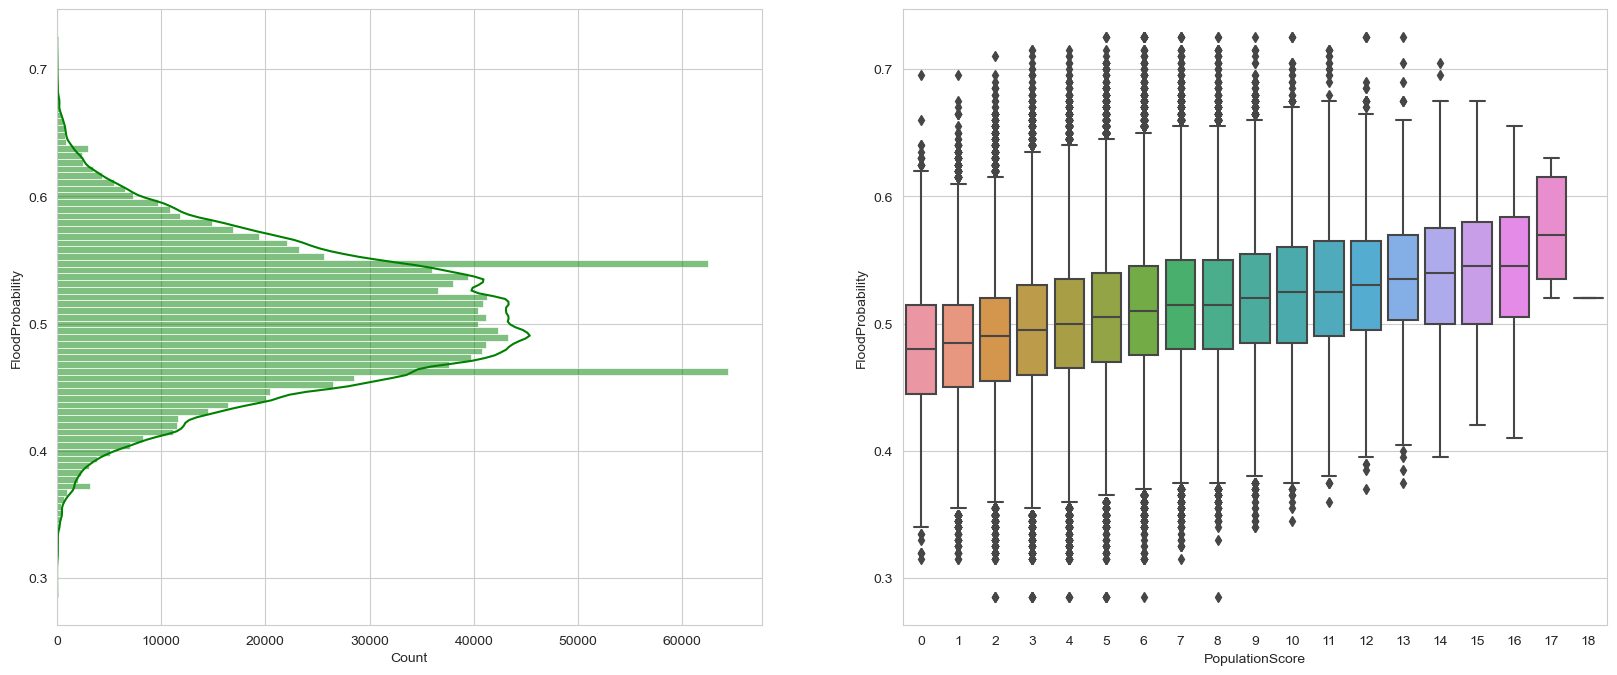

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='PopulationScore', y='FloodProbability')
plt.show()


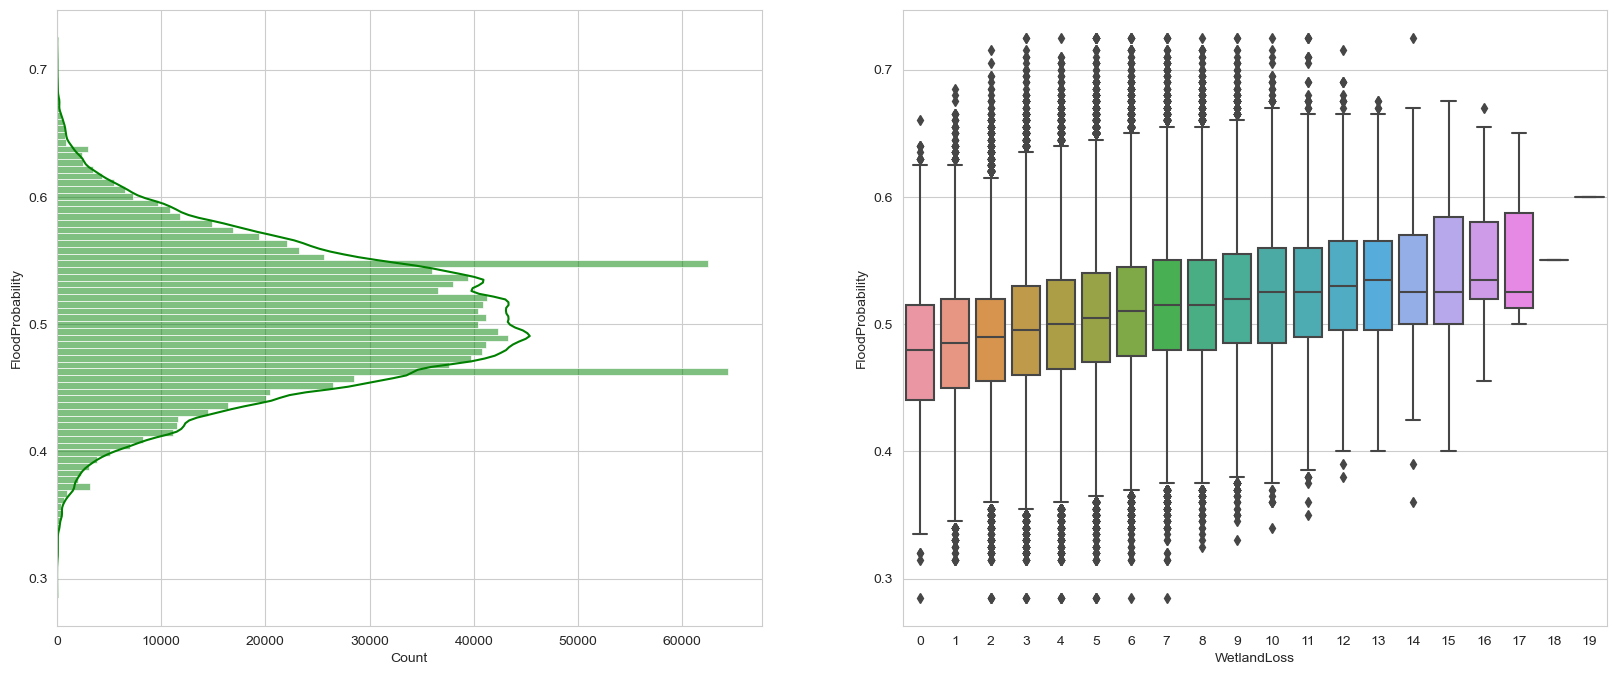

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='WetlandLoss', y='FloodProbability')
plt.show()

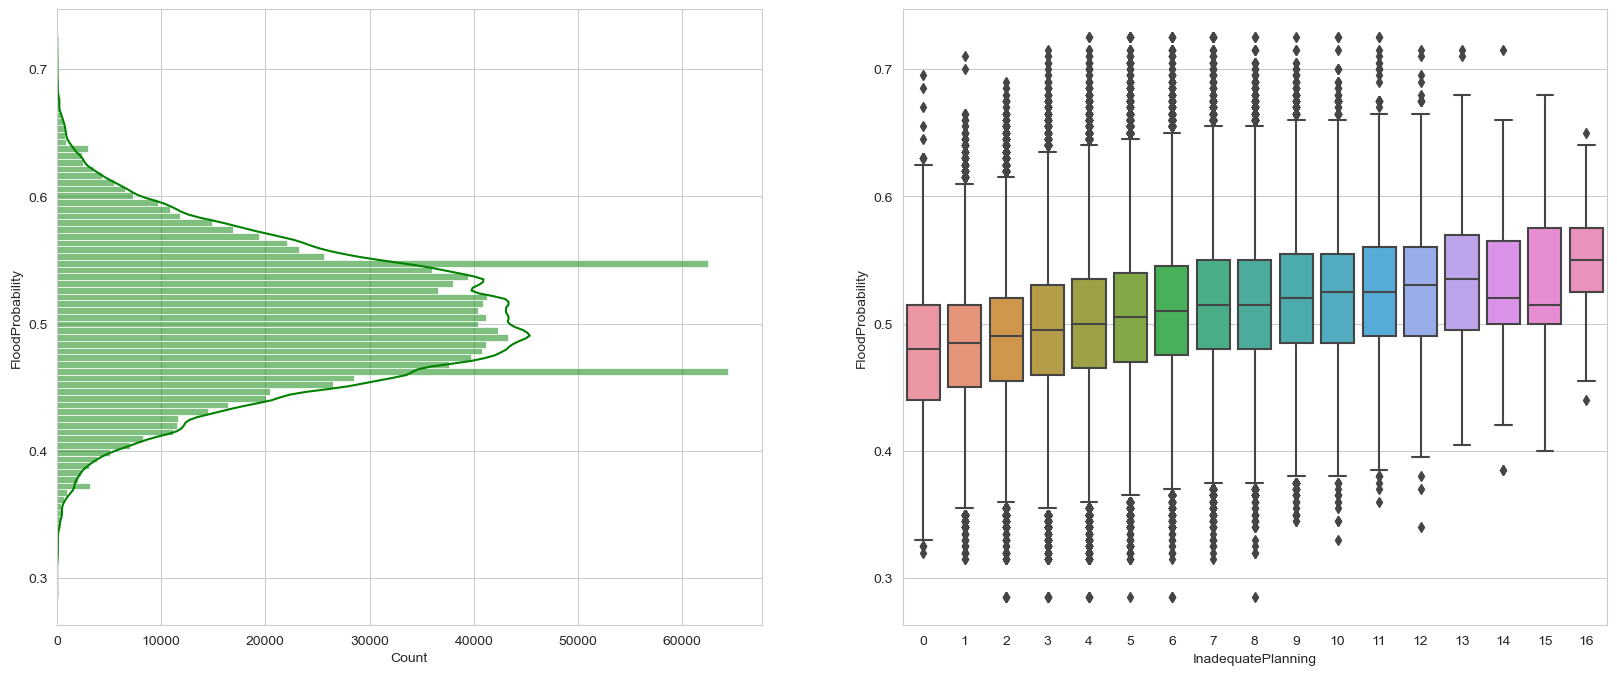

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='InadequatePlanning', y='FloodProbability')
plt.show()

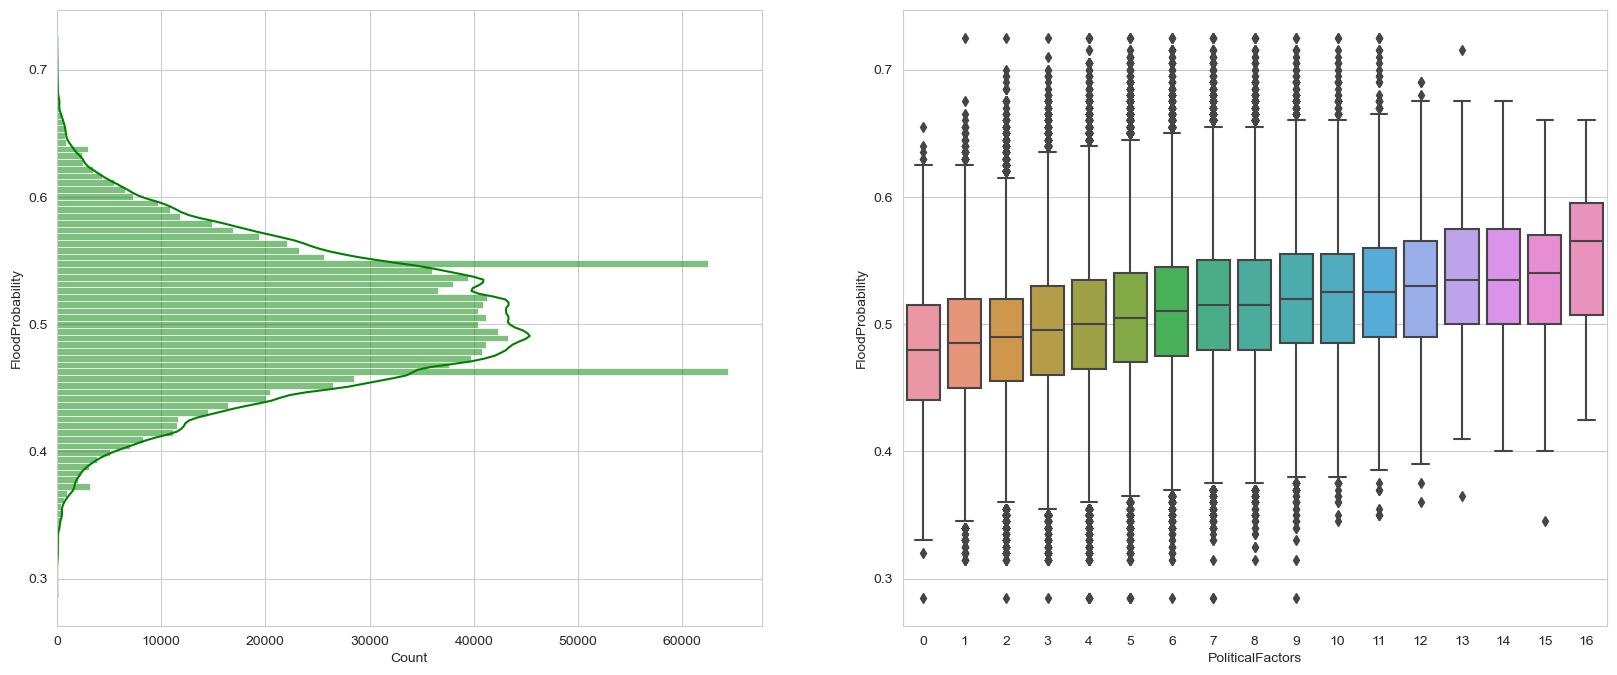

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=train,y='FloodProbability',bins=83,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=train, x='PoliticalFactors', y='FloodProbability')
plt.show()

# CORRELATION ANALYSIS

In [32]:
train.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [33]:
selected_features = ['MonsoonIntensity', 
                     'TopographyDrainage', 
                     'RiverManagement',
                     'Deforestation', 
                     'Urbanization', 
                     'ClimateChange', 
                     'DamsQuality',
                     'Siltation', 
                     'AgriculturalPractices', 
                     'Encroachments',
                     'IneffectiveDisasterPreparedness', 
                     'DrainageSystems',
                     'CoastalVulnerability', 
                     'Landslides', 
                     'Watersheds',
                     'DeterioratingInfrastructure',
                     'PopulationScore', 
                     'WetlandLoss',
                     'InadequatePlanning',
                     'PoliticalFactors', 
                     'FloodProbability']

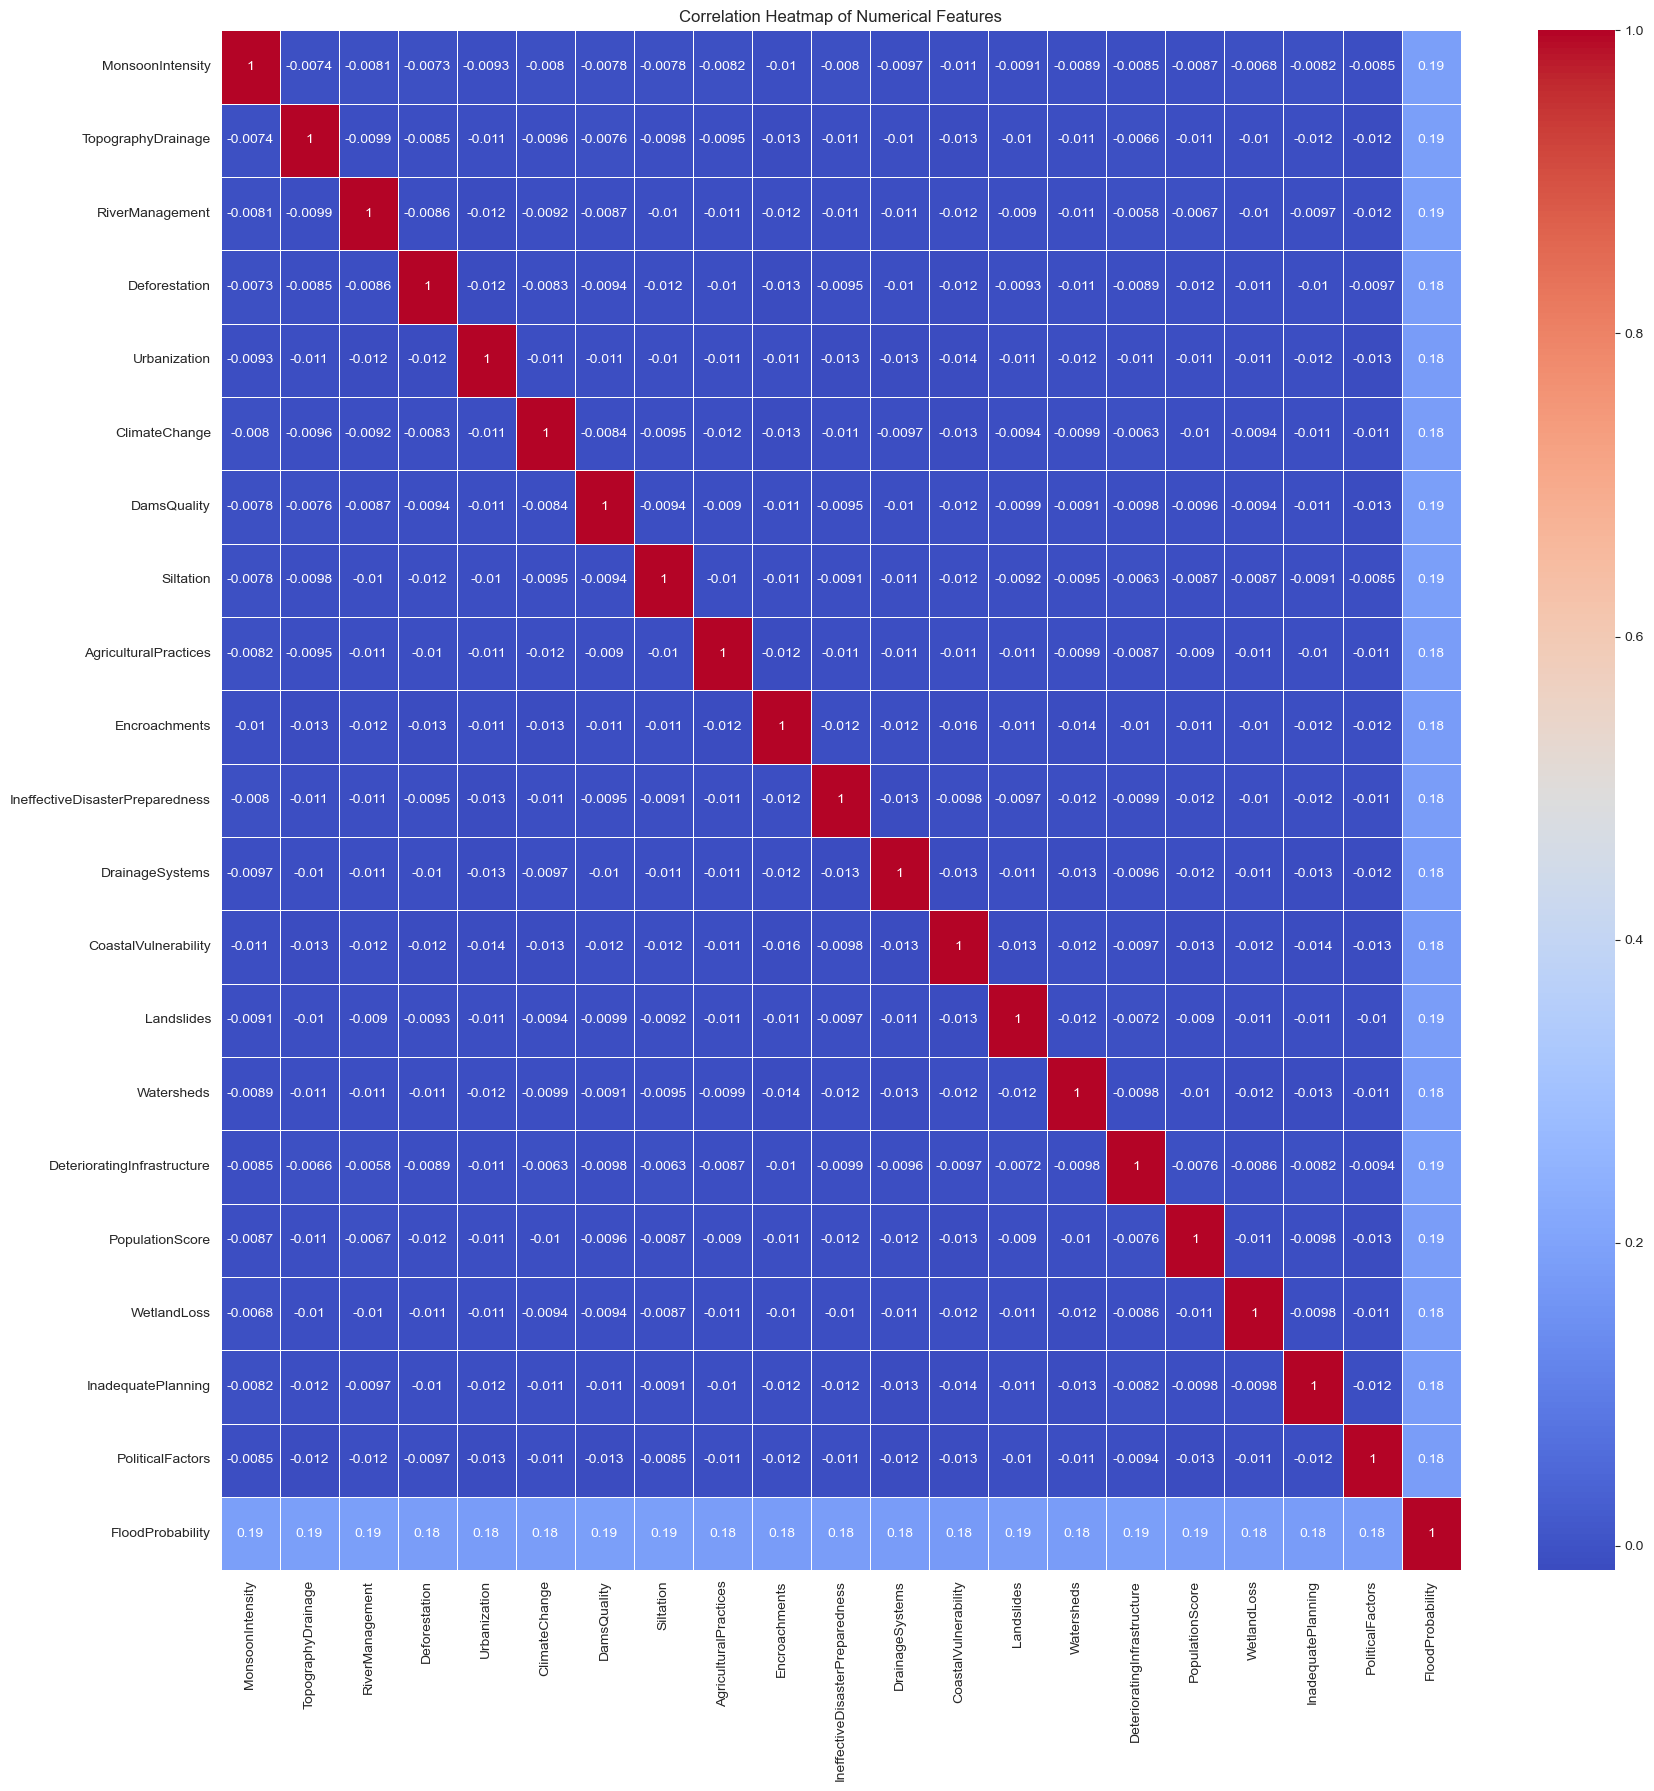

In [34]:
# Calculate the correlation matrix for numerical features only
correlation_matrix = train[selected_features].corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm',linewidths=0.5, annot=correlation_matrix.values)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [35]:
TARGET = 'FloodProbability'
NUMERIC_COLS = [f for f in train._get_numeric_data() if f not in TARGET]
CAT_COLS = list(test.drop(NUMERIC_COLS,axis=1))
print(f'Numeric cols: {len(NUMERIC_COLS)}')
print(f'Cat cols: {len(CAT_COLS)}')

Numeric cols: 20
Cat cols: 0


In [36]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

# MODELLING PIPELINE

In [37]:
# Define your FE transformer class
class FE(BaseEstimator, TransformerMixin):
    def __init__(self, use_quantile=False, sort=False):
        self.use_quantile = use_quantile
        self.sort = sort
        self.numeric_cols = None  # Initialize attribute to store numeric column names

    def fit(self, X, y=None):
        # Store the numeric column names during fitting
        self.numeric_cols = X.columns.tolist()
        return self

    def transform(self, X):
        x_copy = X.copy()
        features = x_copy.columns.tolist()
        x_copy['mean_features'] = 0.1 * x_copy[features].mean(axis=1)
        x_copy['std_features'] = x_copy[features].std(axis=1)
        x_copy['max_features'] = x_copy[features].max(axis=1)
        x_copy['min_features'] = x_copy[features].min(axis=1)
        x_copy['median_features'] = 0.1 * x_copy[features].median(axis=1)
        x_copy['sum_features'] = X[self.numeric_cols].sum(axis=1)
        if self.sort:
            sorted_features = [f'sort_{col}' for col in self.numeric_cols]
            sorted_values = np.sort(x_copy[self.numeric_cols].values, axis=1)
            x_copy[sorted_features] = sorted_values
        if self.use_quantile:
            x_copy['q1'] = x_copy[features].quantile(0.25, axis=1)
            x_copy['q3'] = x_copy[features].quantile(0.75, axis=1)

        x_copy = x_copy.drop(features, axis=1)

        return x_copy

In [38]:
# Define your preprocessing pipeline with the FE step
named_preprocessing_pipeline = Pipeline([
    ('fe', FE(use_quantile=True, sort=True)),  # Add FE step here
    ('drop', DropColumn()),
    ('prep', ColumnTransformer([], remainder='passthrough').set_output(transform='pandas')),
    ('scale', RobustScaler().set_output(transform='pandas'))
])

named_preprocessing_pipeline

Pipeline(steps=[('fe', FE(sort=True, use_quantile=True)),
                ('drop', DropColumn()),
                ('prep',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('scale', RobustScaler())])

In [39]:
#checking output on df dataframe
df_train = named_preprocessing_pipeline.fit_transform(train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117957 entries, 0 to 1117956
Data columns (total 29 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   remainder__mean_features                         1117957 non-null  float64
 1   remainder__std_features                          1117957 non-null  float64
 2   remainder__max_features                          1117957 non-null  float64
 3   remainder__min_features                          1117957 non-null  float64
 4   remainder__median_features                       1117957 non-null  float64
 5   remainder__sum_features                          1117957 non-null  float64
 6   remainder__sort_MonsoonIntensity                 1117957 non-null  float64
 7   remainder__sort_TopographyDrainage               1117957 non-null  float64
 8   remainder__sort_RiverManagement                  1117957 non-null  float64
 9   re

In [40]:
df_train.head()

,remainder__mean_features,remainder__std_features,remainder__max_features,remainder__min_features,remainder__median_features,remainder__sum_features,remainder__sort_MonsoonIntensity,remainder__sort_TopographyDrainage,remainder__sort_RiverManagement,remainder__sort_Deforestation,remainder__sort_Urbanization,remainder__sort_ClimateChange,remainder__sort_DamsQuality,remainder__sort_Siltation,remainder__sort_AgriculturalPractices,remainder__sort_Encroachments,remainder__sort_IneffectiveDisasterPreparedness,remainder__sort_DrainageSystems,remainder__sort_CoastalVulnerability,remainder__sort_Landslides,remainder__sort_Watersheds,remainder__sort_DeterioratingInfrastructure,remainder__sort_PopulationScore,remainder__sort_WetlandLoss,remainder__sort_InadequatePlanning,remainder__sort_PoliticalFactors,remainder__sort_FloodProbability,remainder__q1,remainder__q3
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.399407,-0.561660,-0.5,-0.6875,-1.0,-0.399407,-0.6875,0.00,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-0.5,0.0,-1.0
1,-0.398913,0.514241,0.0,-6.2500,-1.0,-0.398913,-6.2500,-1.55,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.103312,-0.172424,-0.5,0.3750,0.0,0.103312,0.3750,-1.00,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.5,-0.5,0.0,0.0
3,0.598122,-0.664207,-0.5,0.4375,0.0,0.598122,0.4375,0.00,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,1.0,0.0
4,-2.577360,-1.283837,-1.5,-1.0625,-2.0,-2.577360,-1.0625,-1.00,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-1.0,-2.0,-1.0,-1.0,-1.5,-1.0,-1.0


# Model Training 

In [41]:
X = train.drop(['FloodProbability'], axis=1)
y = train['FloodProbability']

In [42]:
kf = KFold(n_splits=config['N_SPLITS'], random_state=config['SEED'],shuffle=True)

In [43]:
scores, oof, test_preds = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [44]:
def score_model(estimator, label='', preprocessing_pipeline=None, X_train=None, y_train=None, test=None, kf=None):
    if preprocessing_pipeline is None:
        print("Preprocessing pipeline not provided.")
        return
    
    if X_train is None or y_train is None or test is None or kf is None:
        print("Data or cross-validation not provided.")
        return
    
    val_predictions = np.zeros((len(X_train)))
    test_predictions = np.zeros((len(test)))
    val_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        model = clone(estimator)
        
        X_train_fold = X_train.iloc[train_idx].reset_index(drop=True)
        y_train_fold = y_train.iloc[train_idx].reset_index(drop=True)
        
        X_val_fold = X_train.iloc[val_idx].reset_index(drop=True)
        y_val_fold = y_train.iloc[val_idx].reset_index(drop=True)
        
        X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train_fold, y_train_fold)
        X_val_preprocessed = preprocessing_pipeline.transform(X_val_fold)
        
        model.fit(X_train_preprocessed, y_train_fold)
        val_preds = model.predict(X_val_preprocessed)
        val_predictions[val_idx] += val_preds
        
        test_predictions += model.predict(preprocessing_pipeline.transform(test)) / kf.get_n_splits()
        
        val_score = r2_score(y_val_fold, val_preds)
        val_scores.append(val_score)
        
        print(f'Fold {fold+1}: {val_score:.5f}')
    
    print(colored(f'Val Score: {np.mean(val_scores):.5f} ± {np.std(val_scores):.5f} | {label}', 'green'))
    
    return val_scores, val_predictions, test_predictions


In [45]:
xgb_model = xgb.XGBRegressor(n_estimators=1200, max_depth=6, learning_rate=0.039987569, random_state=config['SEED'])


In [46]:
%%time
# Define your LightGBM model with the provided parameters
lgbm_params = {
    'num_leaves': 183, 
    'learning_rate': 0.01183688880802108, 
    'n_estimators': 577, 
    'subsample_for_bin': 165697, 
    'min_child_samples': 114, 
    'reg_alpha': 2.075080888948164e-06, 
    'reg_lambda': 3.838938366471552e-07, 
    'colsample_bytree': 0.9634044234652241, 
    'subsample': 0.9592138618622019, 
    'max_depth': 9,
    'random_state': config['SEED'],
    'verbosity': -1
}

lgbm_params['device'] = 'gpu'  # Set device to 'gpu' for GPU acceleration

lgbm_model = LGBMRegressor(**lgbm_params)

# Use the score_model function
scores['LGBM'],oof['LGBM'],test_preds['LGBM'] = score_model(lgbm_model, 'LightGBM', named_preprocessing_pipeline, X, y, test, kf)


Fold 1: 0.86914
Fold 2: 0.86969
Fold 3: 0.86902
Fold 4: 0.86929
Fold 5: 0.86932
Val Score: 0.86929 ± 0.00023 | LightGBM
CPU times: total: 41min 4s
Wall time: 31min 21s


In [47]:
# def objective(trial):
#     # Define hyperparameters to be optimized
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 10),
#         'alpha': trial.suggest_float('alpha', 0, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
#            }
    
#     # Initialize XGBoost model with suggested parameters
#     xgb_model = xgb.XGBRegressor(
#         **params,
#         random_state=config['SEED'],
#         tree_method='gpu_hist'
#     )
    
#     # Perform cross-validation with preprocessing
#     kf = KFold(n_splits=5, shuffle=True, random_state=config['SEED'])
    
#     # Use score_model function to evaluate the model
#     val_scores, _, _ = score_model(xgb_model, 'XGBoost', named_preprocessing_pipeline, X, y, test, kf)
    
#     # Return the negative mean validation score as Optuna aims to minimize the objective
#     return -np.mean(val_scores)

# # Define study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Get the best parameters
# best_params = study.best_params
# print("Best params:", best_params)

In [48]:
%%time
import xgboost as xgb
from catboost import CatBoostRegressor

# Define the XGBoost model with CPU tree method
xgb_model = xgb.XGBRegressor(n_estimators=1200,
                             max_depth=6,
                             learning_rate=0.039987569,
                             random_state=config['SEED'],
                             tree_method='hist')  # Use 'hist' for CPU

# Define the CatBoost model
catboost_model = CatBoostRegressor(iterations=1000,
                                   depth=10,
                                   learning_rate=0.1,
                                   random_seed=config['SEED'],
                                   task_type='CPU')  # Ensure it's running on CPU

# Initialize dictionaries to store scores and predictions
scores = {}
oof = {}
test_preds = {}

# Try to run XGBoost model
try:
    scores['XGB'], oof['XGB'], test_preds['XGB'] = score_model(xgb_model, 'XGBoost', named_preprocessing_pipeline, X, y, test, kf)
except Exception as e:
    print(f"Error during XGBoost model execution: {e}")

# Try to run CatBoost model
try:
    scores['CatBoost'], oof['CatBoost'], test_preds['CatBoost'] = score_model(catboost_model, 'CatBoost', named_preprocessing_pipeline, X, y, test, kf)
except Exception as e:
    print(f"Error during CatBoost model execution: {e}")

# Assuming previous model results are already in oof and test_preds dictionaries
# Ensure all required keys exist in both dictionaries
required_keys = ['XGB', 'CatBoost', 'LGBM']

if all(key in oof for key in required_keys) and all(key in test_preds for key in required_keys):
    xgb_weight = 0.8
    catboost_weight = 0.7
    lgbm_weight = 0.65

    # Combine predictions with weights
    ensemble_oof_weighted = (oof['XGB'] * xgb_weight + oof['CatBoost'] * catboost_weight + oof['LGBM'] * lgbm_weight)
    ensemble_test_preds_weighted = (test_preds['XGB'] * xgb_weight + test_preds['CatBoost'] * catboost_weight + test_preds['LGBM'] * lgbm_weight)

    # Evaluate ensemble performance
    # Assuming evaluate_performance is a function that takes true labels and predictions
    ensemble_score = evaluate_performance(y, ensemble_oof_weighted)
    print(f"Ensemble score: {ensemble_score}")
else:
    print("One or more required keys not found in oof or test_preds. Ensure all models ran successfully.")


Fold 1: 0.86888
Fold 2: 0.86957
Fold 3: 0.86874
Fold 4: 0.86901
Fold 5: 0.86921
Val Score: 0.86908 ± 0.00029 | XGBoost
0:	learn: 0.0467771	total: 365ms	remaining: 6m 4s
1:	learn: 0.0429798	total: 594ms	remaining: 4m 56s
2:	learn: 0.0396152	total: 823ms	remaining: 4m 33s
3:	learn: 0.0366516	total: 1.05s	remaining: 4m 21s
4:	learn: 0.0340559	total: 1.26s	remaining: 4m 11s
5:	learn: 0.0317774	total: 1.49s	remaining: 4m 6s
6:	learn: 0.0298209	total: 1.72s	remaining: 4m 4s
7:	learn: 0.0281194	total: 1.94s	remaining: 4m
8:	learn: 0.0266601	total: 2.15s	remaining: 3m 56s
9:	learn: 0.0253856	total: 2.37s	remaining: 3m 54s
10:	learn: 0.0243121	total: 2.6s	remaining: 3m 53s
11:	learn: 0.0233960	total: 2.83s	remaining: 3m 53s
12:	learn: 0.0226136	total: 3.08s	remaining: 3m 54s
13:	learn: 0.0219660	total: 3.33s	remaining: 3m 54s
14:	learn: 0.0214138	total: 3.6s	remaining: 3m 56s
15:	learn: 0.0209573	total: 3.9s	remaining: 4m
16:	learn: 0.0205666	total: 4.18s	remaining: 4m 1s
17:	learn: 0.0202478	t

In [49]:
%%time
import xgboost as xgb

# Define the XGBoost model with CPU tree method
xgb_model = xgb.XGBRegressor(n_estimators=1200,
                             max_depth=6,
                             learning_rate=0.039987569,
                             random_state=config['SEED'],
                             tree_method='hist')  # Use 'hist' for CPU

# Run the model and capture scores, out-of-fold predictions, and test predictions
scores = {}
oof = {}
test_preds = {}

try:
    scores['XGB'], oof['XGB'], test_preds['XGB'] = score_model(xgb_model, 'XGBoost', named_preprocessing_pipeline, X, y, test, kf)
except Exception as e:
    print(f"Error during XGBoost model execution: {e}")

# Assuming previous model results are already in oof and test_preds dictionaries
# Ensure 'XGB' key exists in both dictionaries
if 'XGB' in oof and 'XGB' in test_preds:
    xgb_weight = 0.8
    catboost_weight = 0.7
    lgbm_weight = 0.65

    # Combine predictions with weights
    ensemble_oof_weighted = (oof['XGB'] * xgb_weight + oof['CatBoost'] * catboost_weight + oof['LGBM'] * lgbm_weight)
    ensemble_test_preds_weighted = (test_preds['XGB'] * xgb_weight + test_preds['CatBoost'] * catboost_weight + test_preds['LGBM'] * lgbm_weight)

    # Evaluate ensemble performance
    # Assuming evaluate_performance is a function that takes true labels and predictions
    ensemble_score = evaluate_performance(y, ensemble_oof_weighted)
    print(f"Ensemble score: {ensemble_score}")

else:
    print("XGB key not found in oof or test_preds. Ensure the XGBoost model ran successfully.")


Fold 1: 0.86888
Fold 2: 0.86957
Fold 3: 0.86874
Fold 4: 0.86901
Fold 5: 0.86921
Val Score: 0.86908 ± 0.00029 | XGBoost


KeyError: 'CatBoost'

In [52]:
# Combine predictions with weights
xgb_weight = 0.8
catboost_weight = 0.7
lgbm_weight = 0.65

# Initialize ensemble oof predictions with XGBoost predictions
ensemble_oof_weighted = oof['XGB'] * xgb_weight

# Add CatBoost predictions if available
if 'CatBoost' in oof:
    ensemble_oof_weighted += oof['CatBoost'] * catboost_weight

# Add LGBM predictions if available
if 'LGBM' in oof:
    ensemble_oof_weighted += oof['LGBM'] * lgbm_weight

# Repeat the same for test predictions if needed


In [53]:
# Evaluate ensemble performance
ensemble_score_weighted = r2_score(y, ensemble_oof_weighted)
print("Weighted Ensemble R^2 Score:", ensemble_score_weighted)

Weighted Ensemble R^2 Score: -3.075526297310134


In [54]:
from sklearn.metrics import r2_score

# Assuming true labels are stored in 'y'
# Assuming ensemble predictions are stored in 'ensemble_oof_weighted'

ensemble_score = r2_score(y, ensemble_oof_weighted)
print("Ensemble R^2 Score:", ensemble_score)


Ensemble R^2 Score: -3.075526297310134


# submission

In [59]:
sample_submission.head()

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
